In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns 
from datetime import datetime

In [2]:
DATA_SET =  os.path.join(os.getcwd(), "Data") 
DATA_PARKRAIL_SAIL = os.path.join(DATA_SET, "parkrail-sale-app.csv")
DATA_MOBILITY = os.path.join(DATA_SET, "mobilitat.csv") 
DATA_PRICES = os.path.join(DATA_SET, "dienststellen-gemass-opentransportdataswiss.csv") 

## Duration and Periode of using Parkrail 

In [3]:
# df_park_sail = pd.read_csv(DATA_PARKRAIL_SAIL, error_bad_lines=False)
df_park_sail = pd.read_csv(DATA_PARKRAIL_SAIL,sep=';' ,error_bad_lines=False)
df_park_sail.head()

,start,end,facility_name,created,updated,verified_payment,booking_status,facility_uuid
0,2020-04-27T09:30:00+02:00,2020-04-28T09:30:00+02:00,Rivera-Bironico,2020-04-27T09:29:10+02:00,2020-04-27T09:29:23+02:00,2020-04-27T09:29:18+02:00,INVOICE_SENT,b5744b84-73b1-43ac-8253-b63aebc201ea
1,2020-04-27T09:30:00+02:00,2020-04-28T09:30:00+02:00,Fehraltorf,2020-04-27T09:26:03+02:00,2020-04-27T09:27:19+02:00,2020-04-27T09:26:52+02:00,INVOICE_SENT,d1e19871-8d37-4347-aa2a-a18a9c575efc
2,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,Bonstetten-Wettswil,2020-04-27T09:24:32+02:00,2020-04-27T09:24:46+02:00,2020-04-27T09:24:42+02:00,INVOICE_SENT,c23edf7e-a81e-4be8-bcb1-0a02e67a5fb7
3,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,St. Gallen St. Fiden,2020-04-27T09:22:09+02:00,2020-04-27T09:22:42+02:00,2020-04-27T09:22:16+02:00,INVOICE_SENT,357be87f-ed9b-4aa2-90fd-1854158172d6
4,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,St. Gallen St. Fiden,2020-04-27T09:21:21+02:00,2020-04-27T09:21:41+02:00,2020-04-27T09:21:30+02:00,INVOICE_SENT,357be87f-ed9b-4aa2-90fd-1854158172d6


In [12]:
# drop unused data for now 
df_park_sail = df_park_sail.drop(["created", "updated", "verified_payment", "booking_status"], axis = 1)

In [13]:
df_park_sail["facility_name"].value_counts()

Yverdon-les-Bains    14076
Sargans               9181
Chur                  8745
Horgen                7759
Lenzburg              7597
                     ...  
Lindenholz (BLS)         1
Därstetten (BLS)         1
Rüti ZH                  1
Rosshäusern (BLS)        1
Schlattingen             1
Name: facility_name, Length: 552, dtype: int64

<AxesSubplot:>

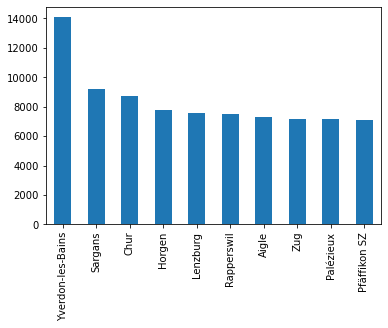

In [14]:
df_park_sail["facility_name"].value_counts().head(10).plot.bar()

In [15]:
df_park_sail["start"] = df_park_sail['start'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail["end"] = df_park_sail['end'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail["dt"] = (df_park_sail["end"] - df_park_sail["start"]) / pd.Timedelta(hours=1)

In [16]:
df_park_sail

,start,end,facility_name,facility_uuid,dt
0,2020-04-27 09:30:00,2020-04-28 09:30:00,Rivera-Bironico,b5744b84-73b1-43ac-8253-b63aebc201ea,24.0
1,2020-04-27 09:30:00,2020-04-28 09:30:00,Fehraltorf,d1e19871-8d37-4347-aa2a-a18a9c575efc,24.0
2,2020-04-27 09:25:00,2020-04-28 09:25:00,Bonstetten-Wettswil,c23edf7e-a81e-4be8-bcb1-0a02e67a5fb7,24.0
3,2020-04-27 09:25:00,2020-04-28 09:25:00,St. Gallen St. Fiden,357be87f-ed9b-4aa2-90fd-1854158172d6,24.0
4,2020-04-27 09:25:00,2020-04-28 09:25:00,St. Gallen St. Fiden,357be87f-ed9b-4aa2-90fd-1854158172d6,24.0
...,...,...,...,...,...
451956,2021-01-16 09:05:00,2021-01-17 21:05:00,Walenstadt,36408746-88fd-4bc2-bbe4-5bbc5843e189,36.0
451957,2021-01-16 10:00:00,2021-01-16 19:00:00,La Chaux-de-Fonds,8b1841ab-0395-46f8-920d-c9b1a044c4e1,9.0
451958,2021-01-16 08:50:00,2021-01-17 08:50:00,Aigle,80b76b2c-d28a-4721-88e2-4b7cde553489,24.0
451959,2021-01-16 08:40:00,2021-01-17 08:40:00,Chavornay,5b02a08a-85c4-4d9a-b043-b3f431d12947,24.0


In [26]:
# sorting based on station name 
grouped_fname = df_park_sail.groupby("facility_name") 

In [30]:
df_1 = df_park_sail[:50]

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>,
        <AxesSubplot:title={'center':'6.0'}>,
        <AxesSubplot:title={'center':'7.0'}>],
       [<AxesSubplot:title={'center':'9.0'}>,
        <AxesSubplot:title={'center':'10.0'}>,
        <AxesSubplot:title={'center':'12.0'}>,
        <AxesSubplot:title={'center':'14.0'}>],
       [<AxesSubplot:title={'center':'24.0'}>,
        <AxesSubplot:title={'center':'48.0'}>,
        <AxesSubplot:title={'center':'72.0'}>,
        <AxesSubplot:title={'center':'108.0'}>],
       [<AxesSubplot:title={'center':'144.0'}>,
        <AxesSubplot:title={'center':'146.0'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

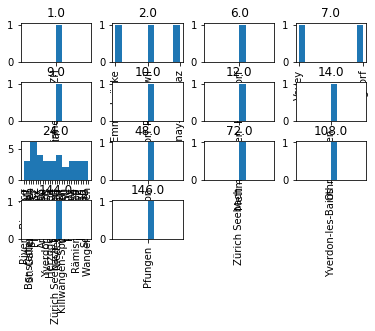

In [31]:
df_1["facility_name"].hist(by=df_1["dt"])

In [22]:
grouped_fname.describe()

dt                                         \
                               count       mean        std  min   25%   50%   
facility_name                                                                 
Aadorf                         753.0  23.916335  11.378388  1.0  24.0  24.0   
Aarberg                        165.0  12.763636  12.736011  1.0   3.0   8.0   
Aarburg-Oftringen              405.0  24.953086  16.710857  1.0  24.0  24.0   
Aathal                         304.0  19.934211  23.170674  1.0   4.0  24.0   
Aefligen (BLS)                   4.0  14.500000  10.969655  5.0   5.0  14.5   
...                              ...        ...        ...  ...   ...   ...   
Zwingen                        285.0  26.459649  20.954577  1.0  24.0  24.0   
Zäziwil                        162.0  23.320988   9.740518  1.0  24.0  24.0   
Zürich Altstetten / Westlink    98.0  11.663265  14.282816  1.0   2.0   5.0   
Zürich Seebach                 676.0  59.545858  53.638372  1.0  24.0  24.0   
Zürich Tiefenbrunnen          5859.0  14.727769  13.271882  1.0   3.0  16.0   

                                           
                               75%    max  
facility_name                              
Aadorf                        24.0  168.0  
Aarberg                       24.0   77.0  
Aarburg-Oftringen             24.0  168.0  
Aathal                        24.0  167.0  
Aefligen (BLS)                24.0   24.0  
...                            ...    ...  
Zwingen                       24.0  168.0  
Zäziwil                       24.0   78.0  
Zürich Altstetten / Westlink  24.0   97.0  
Zürich Seebach                96.0  169.0  
Zürich Tiefenbrunnen          24.0  168.0  

[552 rows x 8 columns]

{'Aadorf': array([   231,    294,    323,   1076,   1358,   1640,   1672,   2084,
          2896,   3172,   4929,   5016,   5049,   6532,   8746,   9084,
          9303,  10768,  11374,  11845,  12708,  12942,  13937,  14203,
         14353,  15127,  15826,  16614,  16874,  17547,  19090,  19172,
         19474,  20651,  21482,  21638,  21639,  21737,  22330,  22417,
         23033,  23084,  23311,  23953,  24819,  25287,  26656,  27904,
         28073,  28815,  29059,  30342,  30557,  31082,  31963,  32971,
         33287,  35458,  37473,  38285,  38450,  39093,  41010,  41901,
         42219,  42624,  43078,  43385,  44239,  44407,  48273,  48738,
         48952,  49155,  49765,  50060,  50117,  50757,  50808,  51423,
         53143,  53208,  53883,  53969,  54149,  54413,  54837,  56681,
         56707,  57101,  57790,  58397,  59007,  59775,  60104,  62405,
         62517,  64032,  64795,  65007,  65017,  65897,  66148,  67055,
         67880,  68360,  69863,  71594,  73791,  74217